1. Project Overview

The objective of this project is to understand which of the given variables will be useful in determining the chance of a student being admitted as this afford us the opportunity to be able to predict if a student will be admitted with the minimum possible error.

The dataset consists of 500 observations and 9 variables. 8 independent variables and 1 dependent variable which makes this project a supervised learning task.


https://www.kaggle.com/mohansacharya/graduate-admissions


The required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the Dataset

In [2]:
dataset = pd.read_csv("Admission_Predict_Ver1.1.csv")
print(dataset.shape)

(500, 9)


In [3]:
# Overview of the first 5 rows
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Summary of the dataset

This gives a brief overview of how the dataset is distributed. A critical look suggests that both University rating and Research are categorical in nature as they are both within 1 - 5 and 0 - 1 respectively.

In [4]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


2. Data Preparation

Dropping the flat variable

In [5]:
dataset.drop(columns=['Serial No.'], axis=1, inplace=True)

Checking for Missing Data

In [6]:
dataset.apply(lambda x: sum(x.isnull()))

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Refining variables to avoid computation difficulties

In [7]:
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
list(dataset)

['gre_score',
 'toefl_score',
 'university_rating',
 'sop',
 'lor',
 'cgpa',
 'research',
 'chance_of_admit']

The distribution of Chance of Admit Checking the distribution of the response variable enables one to determine if the variable is skewed; either to the right or left; or is normallly distributed.

Since, chance of Admit is normally distributed and hence, it is fit for use.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


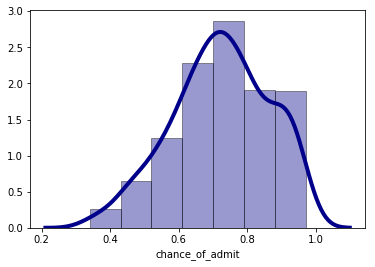

In [8]:
sns.distplot(dataset['chance_of_admit'].dropna(), hist=True, kde=True, 
             bins=int(350/50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Checking that the variables are in the right format

Since Research and University Rating are categorical variable, it is not right to have them as integer. Hence, we change the data type to object.

In [9]:
dataset['university_rating']= dataset.university_rating.astype(object)
dataset['research']= dataset.research.astype(object)

In [10]:
dataset.dtypes

gre_score              int64
toefl_score            int64
university_rating     object
sop                  float64
lor                  float64
cgpa                 float64
research              object
chance_of_admit      float64
dtype: object

Checking for Correlations

Correlation coefficient is a statistical measure that helps in understanding the nature and degree of relationship existing between variable. It shows how strongly pairs of variables are related. If a variable X has a correlation coefficient that is more than 0.5 with variable Y, it is generally regarded as both variable are highly correlated.

In [11]:
pd.DataFrame(dataset.corr()['chance_of_admit'])

,chance_of_admit
gre_score,0.810351
toefl_score,0.792228
sop,0.684137
lor,0.645365
cgpa,0.882413
chance_of_admit,1.000000


From the result above, we can authoritatively conclude that all of the chosen variables are highly correlated with the dependent variable 'chance_of_admit' while research has got the lowest correlation coefficient.

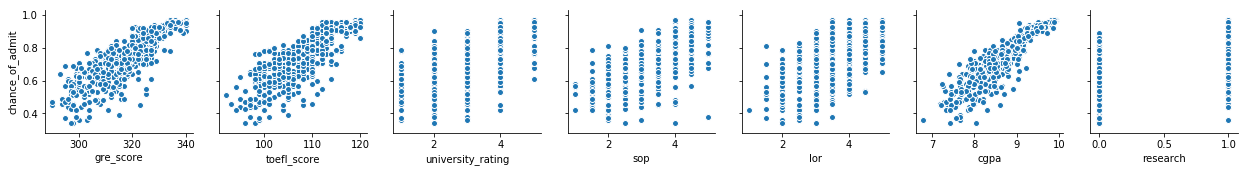

In [12]:
sns.pairplot(data=dataset,
                  y_vars=['chance_of_admit'],
                  x_vars=['gre_score','toefl_score','university_rating','sop','lor','cgpa','research'])

Checking for Multicollinearity between the variables

Mutlicollineairty is a situation where each of the predictors (independent variables) have got strong correlation with one another.

In [13]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,gre_score,toefl_score,sop,lor,cgpa,chance_of_admit
gre_score,1,0.8272,0.613498,0.524679,0.825878,0.810351
toefl_score,0.8272,1,0.64441,0.541563,0.810574,0.792228
sop,0.613498,0.64441,1,0.663707,0.712154,0.684137
lor,0.524679,0.541563,0.663707,1,0.637469,0.645365
cgpa,0.825878,0.810574,0.712154,0.637469,1,0.882413
chance_of_admit,0.810351,0.792228,0.684137,0.645365,0.882413,1


The correlation matrix above suggest that there are strong presence of multicollinearity within the dataset. gre_score for an instance has got 0.83 correlation coefficient with toefl_score. This means they are both giving the same explanation to the reason why a student should be admitted or not. Hence, keeping both of them will skew our model as it will violate the assumption of no or little multicollinearity.

Checking for Outliers

Outliers are numbers or observation that are outside the range of the rest of the data. Hence, an outlier is a data point whose value is higher that 1.5(75% - 25%) or lower than 1.5(75% - 25%).

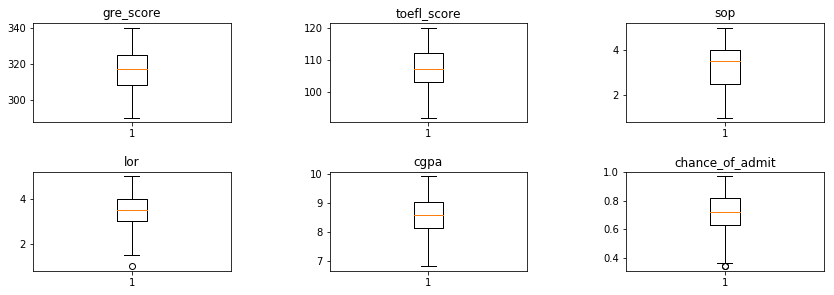

In [14]:
fig, axs = plt.subplots(2, 3)
# gre_score plot
axs[0, 0].boxplot(dataset['gre_score'])
axs[0, 0].set_title('gre_score')

# toefl_score plot
axs[0, 1].boxplot(dataset['toefl_score'])
axs[0, 1].set_title('toefl_score')

# sop plot
axs[0, 2].boxplot(dataset['sop'])
axs[0, 2].set_title("sop")

# lor plot
axs[1, 0].boxplot(dataset['lor'])
axs[1, 0].set_title('lor')

# cgpa plot
axs[1, 1].boxplot(dataset['cgpa'])
axs[1, 1].set_title('cgpa')

# chance of admission plot
axs[1, 2].boxplot(dataset['chance_of_admit'])
axs[1, 2].set_title('chance_of_admit')

fig.subplots_adjust(left=0.15, right=1.98, bottom=0.09, top=0.95,
                    hspace=0.5, wspace=0.5)

plt.show()

or looks like it has got an outlier from the bottom. So let's inspect that. From the diagram below we can clearly observe that there is an outlier.

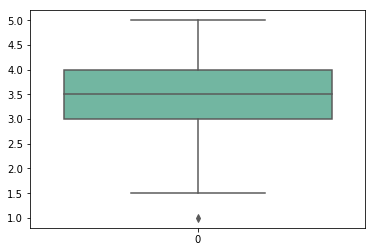

In [15]:
sns.boxplot(data = dataset['lor'], orient="v", palette="Set2")

3. Data Splitting

In [16]:
X = dataset[['toefl_score','university_rating','sop','lor','cgpa','research']]
Y = dataset['chance_of_admit']
X = pd.get_dummies(data=X, drop_first=True)

In [17]:
#Treatment of the outlier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Model building

Linear Regression

In [19]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [20]:
coef_dframe = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficients'])
coef_dframe

,Coefficients
toefl_score,0.122016
sop,0.002802
lor,0.075026
cgpa,0.411319
university_rating_2,-0.004141
university_rating_3,-0.003354
university_rating_4,0.006600
university_rating_5,0.022258
research_1,0.031827


In [21]:
lm_pred = model.predict(X_test)

Text(0.5,0.98,'Actual vs Predicted')

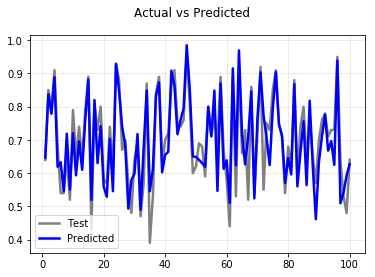

In [22]:
fig = plt.figure()
c = [i for i in range(1,101,1)]
plt.plot(c,y_test, color = 'grey', linewidth = 2.5, label='Test')
plt.plot(c,lm_pred, color = 'blue', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

Model Evaluation for Regression

Root Mean Squared Error(RMSE)

In [23]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,lm_pred))

0.0633984806071119

Mean Absolute Error(MAE)

In [24]:
metrics.mean_absolute_error(y_test,lm_pred)

0.048835980249957764

R Squared and Adjusted R Squared

In [25]:
SS_Residual = sum((y_test-lm_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
R_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_R_squared = 1 - (1-R_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)

print (R_squared, adjusted_R_squared)

0.7698582949489491 0.746844124443844


Random Forest for Regression

In [26]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [27]:
# Train the model on training data
rf_model = rf.fit(X_train, y_train);
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

Model Evaluation for Random Forest

Mean Absolute Error

In [29]:
# Calculate the absolute errors
errors_rf = abs(rf_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_rf), 2))

Mean Absolute Error: 0.05


Root Mean Squared Error(RMSE)

In [30]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,rf_pred))

print('Root Mean Squared Error:', round(rmse,2))

Root Mean Squared Error: 0.07


R Squared and Adjusted R Squared

In [31]:
SS_Residual = sum((y_test-rf_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
R_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_R_squared = 1 - (1-R_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)

print (R_squared, adjusted_R_squared)

0.7446898606621919 0.7191588467284111


In [32]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
cgpa,0.841734
toefl_score,0.059476
sop,0.033830
lor,0.033231
research_1,0.012186
university_rating_2,0.005849
university_rating_3,0.005582
university_rating_4,0.004318
university_rating_5,0.003794


In [33]:
X_test

array([[0.5       , 0.75      , 0.75      , 0.35897436, 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.78571429, 0.75      , 1.        , 0.74358974, 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.67857143, 0.375     , 0.5       , 0.67307692, 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.85714286, 0.875     , 1.        , 0.73076923, 0.        ,
        0.        , 0.        , 1.        , 1.        ],
       [0.35714286, 0.375     , 0.25      , 0.42628205, 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.46428571, 0.625     , 0.375     , 0.48076923, 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.32142857, 0.125     , 0.25      , 0.33974359, 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.64285714, 0.75      , 0.875     , 0.54487179, 0.        ,
        1.        , 0.        , 0.        , 0.        ],


In [34]:
Predictions = model.predict(X_test)
Predictions

array([0.64664619, 0.83737789, 0.778611  , 0.88865583, 0.6191237 ,
       0.6328602 , 0.54585632, 0.71887862, 0.5509132 , 0.7199696 ,
       0.59350384, 0.69557418, 0.61003911, 0.76168094, 0.88196668,
       0.51934507, 0.82013416, 0.63040647, 0.74212107, 0.55916814,
       0.52891302, 0.70311588, 0.54572467, 0.92855602, 0.84674003,
       0.73952571, 0.68548799, 0.49321924, 0.57976256, 0.59801887,
       0.71782639, 0.48986331, 0.67826095, 0.84897606, 0.5453307 ,
       0.61360444, 0.83256243, 0.87295751, 0.60264879, 0.65543654,
       0.66426766, 0.90859345, 0.86428717, 0.71706008, 0.75958901,
       0.79636447, 0.98498409, 0.85149649, 0.65005852, 0.64894582,
       0.63994531, 0.6302486 , 0.61900196, 0.79982001, 0.71150559,
       0.84847458, 0.54655685, 0.86997058, 0.61311615, 0.63833591,
       0.51040134, 0.91533297, 0.62341211, 0.96934686, 0.71446704,
       0.62644941, 0.71036301, 0.84634345, 0.52406782, 0.76447991,
       0.903273  , 0.77381083, 0.70352391, 0.62437162, 0.79538

In [35]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame(Predictions,columns=['Predictions'])

#Visualize the first 5 rows
submission.head()

,Predictions
0,0.646646
1,0.837378
2,0.778611
3,0.888656
4,0.619124


In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)